In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
train_df = pd.read_csv('data/kaggle/house-prices/train.csv', index_col='Id')
test_df = pd.read_csv('data/kaggle/house-prices/test.csv',index_col='Id')

### Data Analysis and understanding

This kernel in kaggles seems to be relevant to the problem I have picked up and an opportunity to learn a lot.
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

Variables analysis @ https://docs.google.com/spreadsheets/d/1GEHcJFNE-pE-UZscw0GGjjkCAZnsmrJnoz1L5j4K09U/edit?usp=sharing

Analysing Salesprice, our dependent target variable

In [3]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

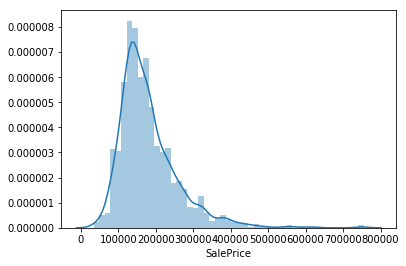

In [4]:
sns.distplot(train_df['SalePrice']);

Descriptive Stats 
Skewness and Kurtosis
https://www.r-bloggers.com/measures-of-skewness-and-kurtosis/

In [5]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


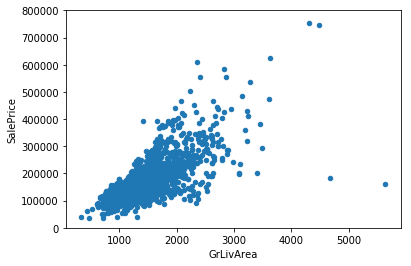

In [6]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

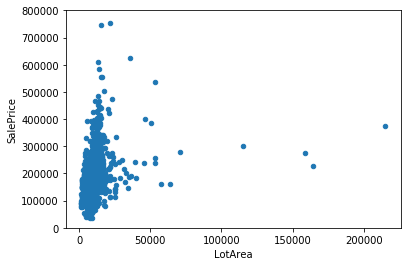

In [7]:
var = 'LotArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

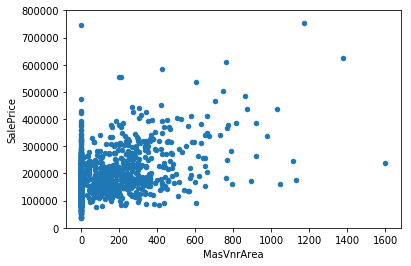

In [8]:
var = 'MasVnrArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

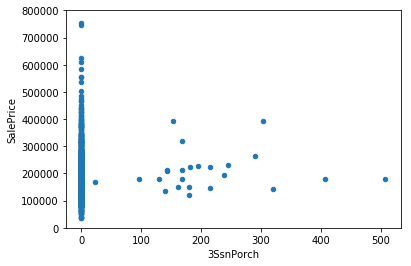

In [9]:
var = '3SsnPorch'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

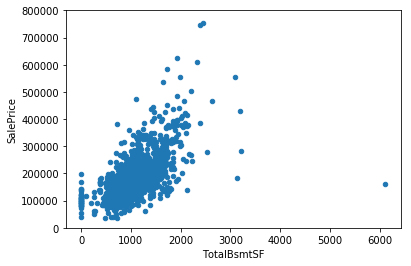

In [10]:
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

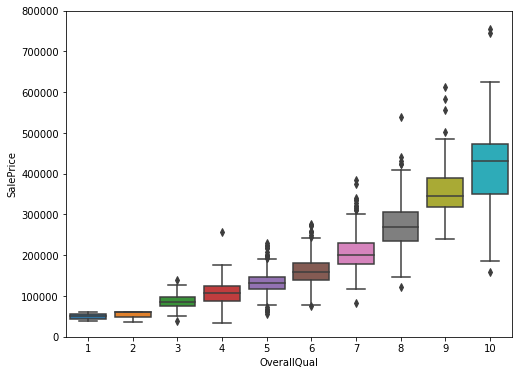

In [11]:
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

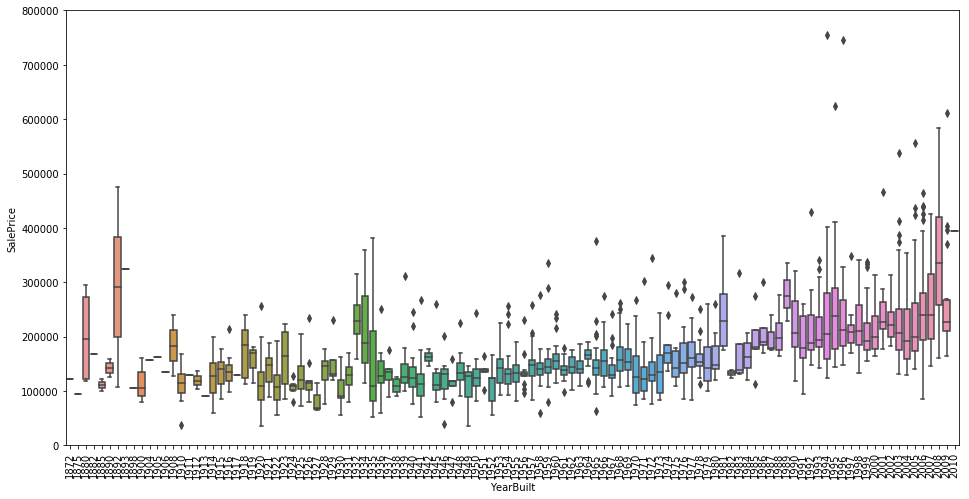

In [12]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

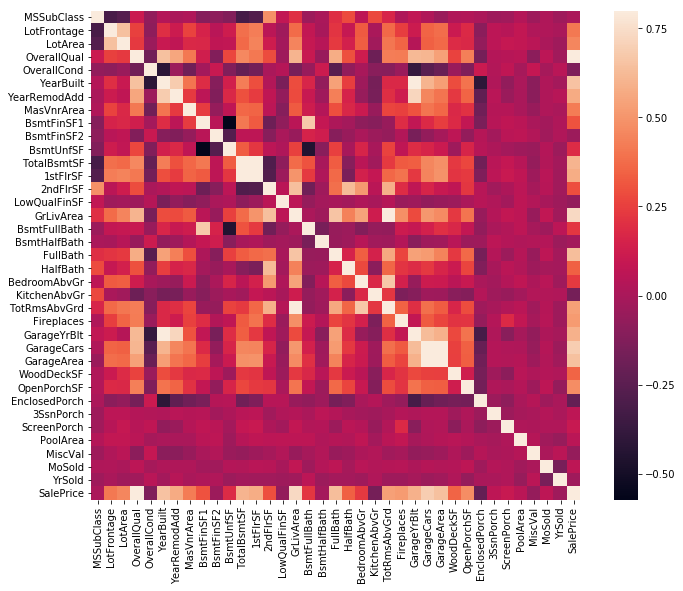

In [13]:
#correlation matrix
corrmat = train_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
corrmat.nlargest(10, 'SalePrice')['SalePrice']

SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
GarageCars     0.690711
YearBuilt      0.652682
GarageArea     0.649379
FullBath       0.635957
TotalBsmtSF    0.602725
GarageYrBlt    0.593788
1stFlrSF       0.575408
Name: SalePrice, dtype: float64

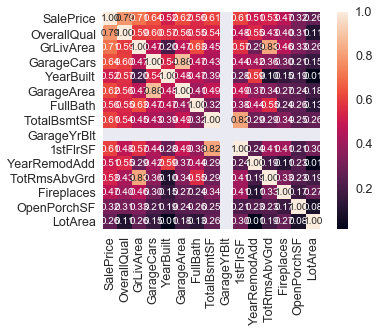

In [15]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

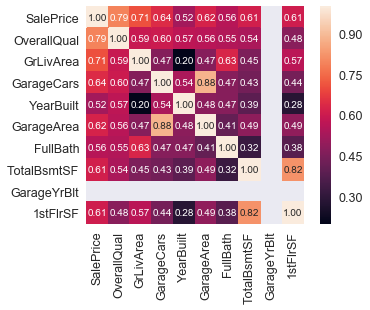

In [16]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

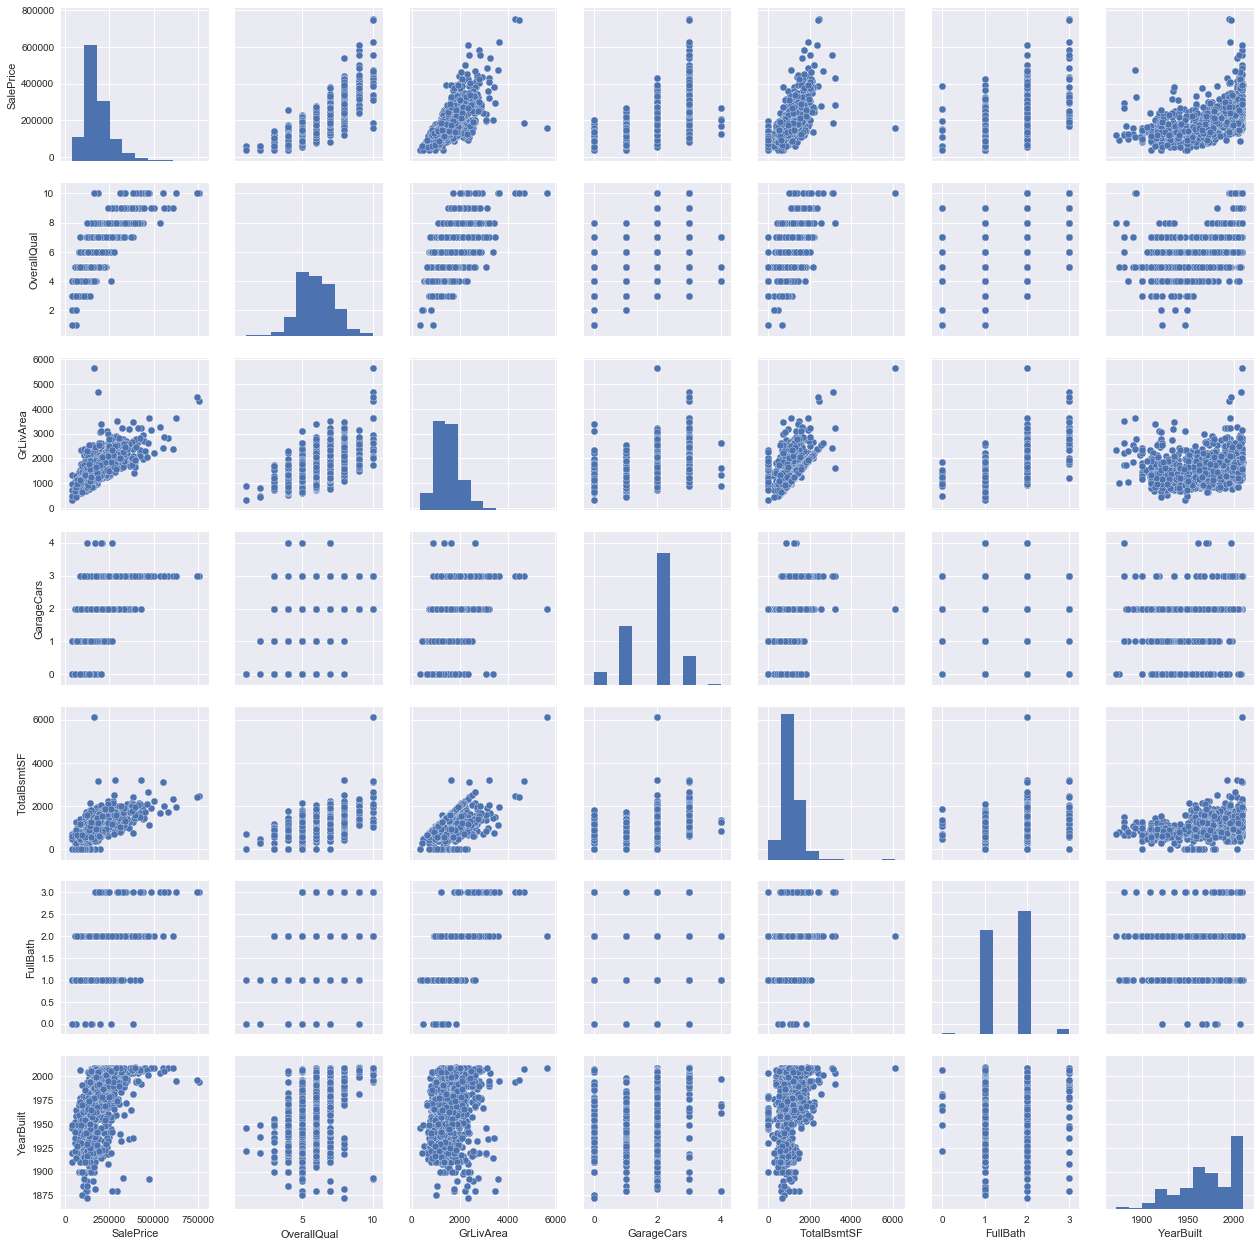

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

In [18]:
total = train_df.isnull().sum().sort_values(ascending=False)

In [19]:
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [ ]:
train_df_cleaned = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df_cleaned = train_df_cleaned.drop(train_df_cleaned.loc[train_df_cleaned['Electrical'].isnull()].index)
train_df_cleaned.isnull().sum().max()

In [ ]:
train_df_cleaned.columns.values

In [190]:
train_df = pd.read_csv('data/kaggle/house-prices/train.csv', index_col='Id')
test_df = pd.read_csv('data/kaggle/house-prices/test.csv',index_col='Id')

In [191]:
target = 'SalePrice'
target_series = train_df[target]
train_df = train_df.drop('SalePrice', axis=1)
train_df['training_set'] = True
test_df['training_set'] = False
full_df = pd.concat([train_df, test_df])

In [192]:
full_df = full_df.copy().drop((missing_data[missing_data['Total'] > 1]).index,1)

In [193]:
full_df.loc[full_df['Electrical'].isnull()].index[0]

1380

In [194]:
target_series = target_series.drop(full_df.loc[full_df['Electrical'].isnull()].index[0])
full_df = full_df.drop(full_df.loc[full_df['Electrical'].isnull()].index)
full_df.isnull().sum().max()

4

In [195]:
full_df = full_df.interpolate()
full_df = pd.get_dummies(full_df)

In [196]:
train_df.shape

(1460, 80)

In [197]:
target_series.shape

(1459,)

In [198]:
train_df = full_df[full_df['training_set']].drop('training_set', axis=1)
test_df = full_df[~full_df['training_set']].drop('training_set', axis=1)
train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0


In [199]:
print(train_df.shape, target_series.shape)

(1459, 220) (1459,)


In [200]:
rf2 = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf2.fit(train_df, target_series)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [201]:
predictions = rf1.predict(test_df)

In [202]:
my_submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': predictions})

In [203]:
my_submission.to_csv('data/kaggle/house-prices/submission2.csv', index=False)

In [204]:
my_submission.shape

(1459, 2)

Inspired by (https://towardsdatascience.com/machine-learning-zero-to-hero-everything-you-need-in-order-to-compete-on-kaggle-for-the-first-time-18644e701cf1)[https://towardsdatascience.com/machine-learning-zero-to-hero-everything-you-need-in-order-to-compete-on-kaggle-for-the-first-time-18644e701cf1]